# Feature Selection
## Classification - Categorical Input
Breast Cancer data can be found [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv)    
Data Description: [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.names)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression

In [12]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'
df = pd.read_csv(url, header=None)

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
X.head()

,0,1,2,3,4,5,6,7,8
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no'


In [17]:
y.head()

0       'recurrence-events'
1    'no-recurrence-events'
2       'recurrence-events'
3    'no-recurrence-events'
4       'recurrence-events'
Name: 9, dtype: object

In [18]:
X.isnull().sum()

0    0
1    0
2    0
3    0
4    8
5    0
6    0
7    1
8    0
dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [20]:
si = SimpleImputer(strategy='most_frequent')
si.fit(X_train)
X_train = si.transform(X_train)
X_test = si.transform(X_test)

In [29]:
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

In [32]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

In [33]:
fs = SelectKBest(score_func=chi2, k=4)
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

<BarContainer object of 9 artists>

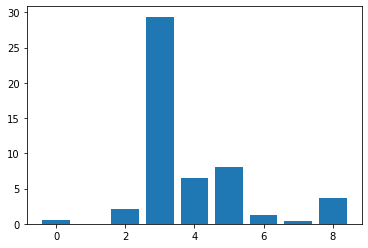

In [34]:
plt.bar([i for i, _ in enumerate(fs.scores_)], fs.scores_)

Further information on feature selection with $\chi^2$ [here](https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223)

In [35]:
model = LogisticRegression()
model.fit(X_train_enc, y_train)
model.score(X_test_enc, y_test)

0.7473684210526316

In [36]:
model = LogisticRegression()
model.fit(X_train_fs, y_train)
model.score(X_test_fs, y_test)

0.7578947368421053